#**Case 1 | Task 1**

### Data & Visualisasi

- **`import pandas as pd`**  
  Untuk membaca, memanipulasi, dan menganalisis data dalam bentuk tabel (DataFrame). Sangat cocok untuk eksplorasi dataset.

- **`import numpy as np`**  
  Digunakan untuk operasi numerik seperti array, statistik, dan perhitungan matematis lainnya.

- **`import matplotlib.pyplot as plt`**  
  Library visualisasi dasar untuk membuat grafik seperti garis, batang, dan sebaran. Digunakan untuk menampilkan grafik akurasi dan loss model.

- **`import seaborn as sns`**  
  Digunakan untuk membuat visualisasi statistik yang lebih menarik dan informatif, seperti confusion matrix dalam bentuk heatmap.

---

### Pembersihan & Manipulasi Teks

- **`import re`**  
  Digunakan untuk membersihkan teks menggunakan pola regex, seperti menghapus tag `<USER_MENTION>`, simbol, atau URL.

- **`import string`**  
  Untuk mengelola karakter dan tanda baca pada teks, misalnya menghapus tanda baca saat preprocessing.

---

### Machine Learning & Deep Learning

- **`import tensorflow as tf`**  
  Framework utama untuk membangun dan melatih model deep learning.

- **`from tensorflow import keras`**  
  API tingkat tinggi dari TensorFlow untuk membangun dan melatih model neural network secara lebih praktis.

- **`from tensorflow.keras.preprocessing.text import Tokenizer`**  
  Untuk mengubah teks menjadi token angka (integer), langkah penting dalam Natural Language Processing (NLP).

- **`from tensorflow.keras.preprocessing.sequence import pad_sequences`**  
  Digunakan untuk menyamakan panjang semua input teks (padding) agar bisa diproses oleh model.

- **`from tensorflow.keras import layers`**  
  Berisi layer-layer seperti `Embedding`, `LSTM`, `Dense`, dan `Dropout` yang digunakan dalam membangun model neural network.

---

### Evaluasi & Pembagian Data

- **`from sklearn.model_selection import train_test_split`**  
  Untuk membagi dataset menjadi data latih (`train`) dan data uji (`test`).

- **`from sklearn.preprocessing import LabelEncoder`**  
  Digunakan untuk mengubah label teks (seperti "positive", "negative") menjadi angka (0 dan 1).

- **`from sklearn.metrics import classification_report, confusion_matrix`**  
  Digunakan untuk mengevaluasi performa model klasifikasi melalui metrik seperti precision, recall, f1-score, dan membuat confusion matrix.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

### Hyperparameter Tuning

- **`!pip install -q keras-tuner`**  
  Perintah untuk menginstal library **Keras Tuner** di Google Colab. Digunakan untuk melakukan pencarian otomatis terhadap kombinasi hyperparameter terbaik dalam model deep learning.

- **`import keras_tuner as kt`**  
  Mengimpor library `keras_tuner` dan menyingkatnya menjadi `kt`, sehingga bisa digunakan untuk membuat objek tuner seperti `kt.Hyperband` atau `kt.RandomSearch`.


In [2]:
!pip install -q keras-tuner
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


### Upload File dari Komputer Lokal

- **`from google.colab import files`**  
  Mengimpor modul `files` dari Google Colab yang memungkinkan pengguna mengunggah file dari komputer lokal ke lingkungan Colab.

- **`uploaded = files.upload()`**  
  Menjalankan fungsi upload untuk memilih dan mengunggah file dari perangkat pengguna. File yang diunggah akan tersedia di direktori kerja saat runtime aktif.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset_tweet_sentiment_cellular_service_provider.csv to dataset_tweet_sentiment_cellular_service_provider.csv


### Membaca Dataset dan Melihat Struktur Awal

- **`df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')`**  
  Membaca file CSV dan memuatnya ke dalam bentuk DataFrame bernama `df` menggunakan pandas.

- **`print("Jumlah data:", df.shape)`**  
  Menampilkan jumlah baris dan kolom dalam dataset (jumlah data dan fitur).

- **`df.head()`**  
  Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas isi data.


In [4]:
df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
print("Jumlah data:", df.shape)

Jumlah data: (300, 3)


In [5]:
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


### Membersihkan Teks Tweet (Text Preprocessing)

- **`def clean_text(text):`**  
  Mendefinisikan fungsi `clean_text` untuk membersihkan teks dari karakter atau pola yang tidak diperlukan sebelum diproses oleh model.

- **`text = text.lower()`**  
  Mengubah semua huruf menjadi huruf kecil agar seragam.

- **`re.sub(r'<.*?>', '', text)`**  
  Menghapus tag seperti `<USER_MENTION>` atau `<PROVIDER_NAME>`.

- **`re.sub(r"http\S+|www\S+|https\S+", '', text)`**  
  Menghapus URL atau tautan dari teks.

- **`re.sub(r'\@w+|\#','', text)`**  
  Menghapus simbol `@` dan `#` beserta teks setelahnya.

- **`re.sub(r'[^A-Za-z\s]', '', text)`**  
  Menghapus semua karakter selain huruf dan spasi (tanda baca, angka, simbol).

- **`re.sub(r'\s+', ' ', text).strip()`**  
  Menghapus spasi berlebih dan whitespace di awal/akhir teks.

- **`df['clean_text'] = df['Text Tweet'].apply(clean_text)`**  
  Menerapkan fungsi `clean_text` ke setiap baris pada kolom "Text Tweet" dan menyimpan hasilnya di kolom baru `clean_text`.


In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['clean_text'] = df['Text Tweet'].apply(clean_text)

In [7]:
df.head()

,Id,Sentiment,Text Tweet,clean_text
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,boikot gunakan produk bangsa sendiri
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",saktinya balik lagi alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kamar ...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pada...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta


### Melihat Distribusi Label Sentimen

- **`df['Sentiment'].value_counts()`**  
  Menghitung jumlah kemunculan masing-masing label sentimen (misalnya: positive, negative) dalam kolom `Sentiment`.  
  Digunakan untuk mengetahui apakah data seimbang (balanced) atau tidak (imbalanced).


In [8]:
df['Sentiment'].value_counts()

,count
Sentiment,
negative,161
positive,139


### Encoding Label dan Membagi Data

- **`le = LabelEncoder()`**  
  Membuat objek `LabelEncoder` dari scikit-learn untuk mengubah label sentimen dari bentuk teks (seperti 'positive', 'negative') menjadi angka (misalnya 0 dan 1).

- **`df['label'] = le.fit_transform(df['Sentiment'])`**  
  Mengubah isi kolom `Sentiment` menjadi label numerik dan menyimpannya dalam kolom baru bernama `label`.

- **`X = df['clean_text']`**  
  Menyimpan fitur (teks bersih hasil preprocessing) ke variabel `X`.

- **`y = df['label']`**  
  Menyimpan label hasil encoding ke variabel `y`.

- **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**  
  Membagi dataset menjadi data latih dan data uji dengan rasio 80:20. Parameter `random_state=42` digunakan untuk memastikan hasil pembagian selalu sama jika dijalankan ulang.


In [9]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenisasi dan Padding Data Teks

- **`tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")`**  
  Membuat objek `Tokenizer` untuk mengubah teks menjadi token angka. Hanya 10.000 kata paling umum yang akan dipertahankan. Kata yang tidak dikenal akan digantikan oleh token "<OOV>".

- **`tokenizer.fit_on_texts(X_train)`**  
  Melatih tokenizer berdasarkan data latih untuk membangun kamus kata dan frekuensinya.

- **`X_train_seq = tokenizer.texts_to_sequences(X_train)`**  
  Mengubah teks pada data latih menjadi urutan angka sesuai dengan kamus yang sudah dibangun.

- **`X_test_seq = tokenizer.texts_to_sequences(X_test)`**  
  Mengubah teks pada data uji menjadi urutan angka menggunakan tokenizer yang sama.

- **`max_len = max([len(seq) for seq in X_train_seq])`**  
  Menentukan panjang urutan maksimum berdasarkan data latih. Nilai ini akan digunakan untuk padding agar semua input memiliki panjang yang seragam.

- **`X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')`**  
  Melakukan padding pada urutan data latih hingga panjang `max_len` dengan menambahkan nol di akhir (`padding='post'`).

- **`X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')`**  
  Melakukan hal yang sama untuk data uji agar model bisa memproses input dengan bentuk yang konsisten.


In [10]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

### Membangun Model Neural Network dengan Hyperparameter Tuning

- **`def build_model(hp):`**  
  Fungsi untuk membangun arsitektur model Keras. Parameter `hp` digunakan untuk memilih nilai hyperparameter secara dinamis melalui Keras Tuner.

- **`keras.Sequential()`**  
  Membuat model berurutan (sequential) di mana layer ditambahkan satu per satu.

- **`layers.Embedding(input_dim=10000, output_dim=hp.Int(...), input_length=max_len)`**  
  Layer embedding untuk mengubah token integer menjadi vektor berdimensi tetap.  
  - `input_dim=10000`: jumlah kata unik yang dipertimbangkan.  
  - `output_dim`: dimensi vektor embedding, ditentukan oleh Keras Tuner antara 16–64.  
  - `input_length=max_len`: panjang input tetap (setelah padding).

- **`layers.Bidirectional(layers.LSTM(...))`**  
  Layer LSTM dua arah untuk menangkap konteks dari kedua arah teks.  
  - `units`: jumlah unit LSTM, ditentukan oleh tuner (32–128).  
  - `return_sequences=False`: hanya mengembalikan output akhir (bukan seluruh urutan).

- **`layers.Dense(..., activation='relu')`**  
  Fully-connected layer untuk proses klasifikasi lanjutan.  
  - `units`: jumlah neuron, ditentukan oleh tuner (16–64).  
  - `activation='relu'`: fungsi aktivasi ReLU untuk memperkenalkan non-linearitas.

- **`layers.Dropout(...)`**  
  Dropout layer untuk mencegah overfitting dengan cara mengabaikan sejumlah neuron secara acak selama pelatihan.  
  - `rate`: nilai dropout, ditentukan oleh tuner (antara 0.2–0.5).

- **`layers.Dense(1, activation='sigmoid')`**  
  Layer output untuk klasifikasi biner. Menghasilkan probabilitas antara 0 dan 1.  
  - `1 neuron`: cukup karena hanya ada dua kelas.  
  - `activation='sigmoid'`: fungsi aktivasi untuk output biner.

- **`model.compile(...)`**  
  Menyusun model dengan:  
  - Optimizer: `Adam`, dengan learning rate 0.001 atau 0.0001 (ditentukan oleh tuner).  
  - Loss function: `binary_crossentropy`, digunakan untuk klasifikasi dua kelas.  
  - Metrics: `accuracy`, untuk mengevaluasi performa model.

- **`return model`**  
  Mengembalikan model yang telah dikonfigurasi untuk digunakan dalam proses tuning dan pelatihan.


In [11]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=10000, output_dim=hp.Int('embed_dim', 16, 64, step=16), input_length=max_len))
    model.add(layers.Bidirectional(layers.LSTM(units=hp.Int('lstm_units', 32, 128, step=32), return_sequences=False)))
    model.add(layers.Dense(units=hp.Int('dense_units', 16, 64, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

### Inisialisasi Hyperband Tuner

- **`kt.Hyperband(...)`**  
  Membuat objek tuner menggunakan algoritma Hyperband dari Keras Tuner, untuk mencari kombinasi hyperparameter terbaik berdasarkan akurasi validasi.

- **`build_model`**  
  Fungsi yang akan digunakan untuk membangun model dengan parameter yang akan dituning.

- **`objective='val_accuracy'`**  
  Target metrik yang akan dioptimasi selama tuning, yaitu akurasi pada data validasi.

- **`max_epochs=10`**  
  Jumlah maksimum epoch pelatihan untuk konfigurasi model terbaik.

- **`factor=3`**  
  Menentukan seberapa cepat model dengan performa rendah akan dieliminasi pada setiap iterasi. Nilai ini mengatur strategi pengurangan sumber daya.

- **`directory='keras_tuner_dir'`**  
  Direktori lokal tempat hasil tuning akan disimpan.

- **`project_name='sentiment_analysis_hyperband'`**  
  Nama proyek tuning yang akan digunakan sebagai nama subfolder di dalam direktori.


In [13]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='sentiment_analysis_hyperband'
)

### Menjalankan Hyperparameter Tuning dengan Early Stopping

- **`stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)`**  
  Membuat callback `EarlyStopping` untuk menghentikan pelatihan lebih awal jika `val_loss` tidak membaik setelah 3 epoch berturut-turut.  
  Ini membantu mencegah overfitting dan menghemat waktu pelatihan.

- **`tuner.search(X_train_pad, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])`**  
  Menjalankan proses pencarian hyperparameter menggunakan data latih (`X_train_pad`, `y_train`) selama maksimal 20 epoch.  
  - `validation_split=0.2`: 20% dari data latih digunakan sebagai data validasi.  
  - `callbacks=[stop_early]`: menyisipkan mekanisme early stopping ke dalam proses pelatihan model selama tuning.


In [14]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train_pad, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.5833333134651184

Best val_accuracy So Far: 0.7708333134651184
Total elapsed time: 00h 02m 04s


### Menampilkan Hyperparameter Terbaik dari Hasil Tuning

- **`best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]`**  
  Mengambil kombinasi hyperparameter terbaik dari proses tuning.  
  `num_trials=1` berarti hanya mengambil 1 set terbaik berdasarkan metrik objektif (val_accuracy).

- **`print(...)`**  
  Menampilkan nilai-nilai hyperparameter terbaik yang ditemukan oleh tuner, yaitu:
  - `Embedding Dimension`: dimensi vektor dari layer embedding.
  - `LSTM Units`: jumlah unit pada layer LSTM.
  - `Dense Units`: jumlah neuron pada layer dense.
  - `Dropout Rate`: tingkat dropout untuk mengurangi overfitting.
  - `Learning Rate`: kecepatan pembelajaran untuk optimizer.


In [15]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Embedding Dimension: {best_hps.get('embed_dim')}")
print(f"LSTM Units: {best_hps.get('lstm_units')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Learning Rate: {best_hps.get('lr')}")

Best Hyperparameters:
Embedding Dimension: 16
LSTM Units: 96
Dense Units: 48
Dropout Rate: 0.4
Learning Rate: 0.001


### Membangun Ulang Model dengan Hyperparameter Terbaik

- **`model = build_model(best_hps)`**  
  Membuat ulang model neural network menggunakan kombinasi hyperparameter terbaik yang diperoleh dari proses tuning.

- **`model.build(input_shape=(None, max_len))`**  
  Membangun arsitektur model secara eksplisit dengan bentuk input tertentu.  
  - `None`: menandakan ukuran batch bersifat fleksibel.  
  - `max_len`: panjang input (jumlah token per teks) yang sudah ditentukan saat padding.  
  Baris ini diperlukan agar `model.summary()` bisa menampilkan struktur dan jumlah parameter model secara lengkap sebelum pelatihan.


In [16]:
model = build_model(best_hps)
model.build(input_shape=(None, max_len))

### Menampilkan Ringkasan Arsitektur Model

- **`model.summary()`**  
  Menampilkan struktur lengkap model neural network, termasuk:
  - Nama dan jenis setiap layer
  - Output shape dari tiap layer
  - Jumlah parameter yang dapat dilatih (trainable) dan tidak dapat dilatih (non-trainable)

Digunakan untuk memverifikasi arsitektur model sebelum proses pelatihan dimulai.


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 21, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 192)            │        86,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,097 (1000.38 KB)

 Trainable params: 256,097 (1000.38 KB)

 Non-trainable params: 0 (0.00 B)

### Melatih Model dengan Data Latih

- **`history = model.fit(...)`**  
  Melatih model neural network menggunakan data latih yang sudah diproses.

  - `X_train_pad`, `y_train`: input dan label dari data latih.
  - `epochs=10`: jumlah iterasi penuh melintasi seluruh dataset latih sebanyak 10 kali.
  - `validation_split=0.2`: 20% dari data latih digunakan sebagai data validasi.
  - `verbose=1`: menampilkan progress training secara detail di output.

Hasil pelatihan akan disimpan dalam variabel `history`, yang dapat digunakan untuk visualisasi akurasi dan loss.


In [18]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5933 - loss: 0.6919 - val_accuracy: 0.5833 - val_loss: 0.6869
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5455 - loss: 0.6886 - val_accuracy: 0.5833 - val_loss: 0.6847
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4894 - loss: 0.6929 - val_accuracy: 0.5833 - val_loss: 0.6843
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5234 - loss: 0.6893 - val_accuracy: 0.5833 - val_loss: 0.6814
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5552 - loss: 0.6781 - val_accuracy: 0.5833 - val_loss: 0.6735
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6285 - loss: 0.6519 - val_accuracy: 0.6875 - val_loss: 0.6671
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8703 - loss: 0.6254 - val_accuracy: 0.6875 - val_loss: 0.6279
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7860 - loss: 0.5157 - val_accuracy: 0.6667 - val_loss: 0.5555


### Visualisasi Akurasi dan Loss Selama Pelatihan

- **`history.history[...]`**  
  Mengambil data akurasi dan loss dari proses pelatihan yang tersimpan dalam objek `history`, baik untuk data training maupun validasi.

- **`plt.subplot(1, 2, 1)`**  
  Membuat plot pertama untuk menampilkan perbandingan antara akurasi pelatihan (`accuracy`) dan akurasi validasi (`val_accuracy`).

- **`plt.subplot(1, 2, 2)`**  
  Membuat plot kedua untuk menampilkan perbandingan antara loss pelatihan (`loss`) dan loss validasi (`val_loss`).

- **`plt.legend()` dan `plt.title()`**  
  Menambahkan legenda dan judul pada masing-masing grafik untuk memperjelas isi visualisasi.

- **`plt.show()`**  
  Menampilkan seluruh grafik dalam satu tampilan.

Tujuan visualisasi ini adalah untuk memantau apakah model mengalami overfitting atau underfitting selama pelatihan.


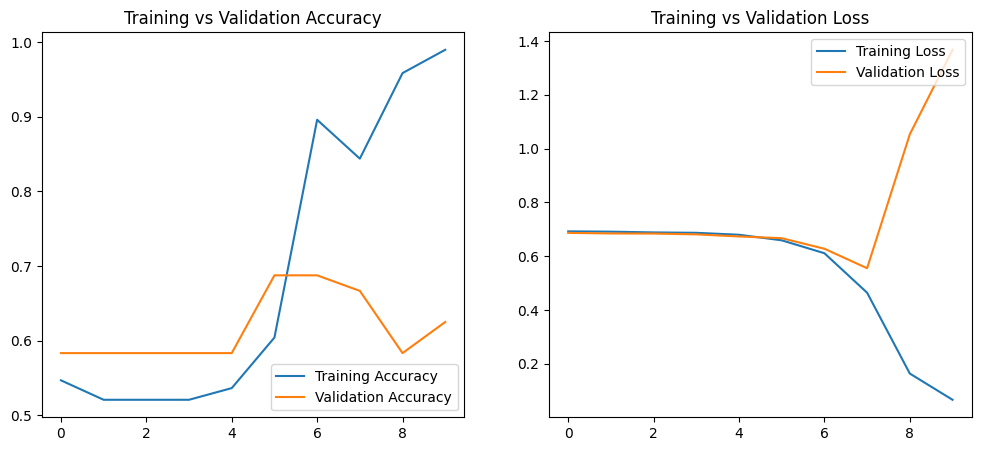

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

### Evaluasi Model pada Data Uji

- **`model.evaluate(X_test_pad, y_test)`**  
  Mengukur performa model pada data uji menggunakan metrik yang telah ditentukan saat `compile` (dalam hal ini: loss dan accuracy).

- **`loss, acc = ...`**  
  Menyimpan nilai loss dan akurasi dari hasil evaluasi ke dalam variabel `loss` dan `acc`.

- **`print(f"Test Loss: {loss:.4f}")`**  
  Menampilkan nilai loss pada data uji hingga 4 digit desimal.

- **`print(f"Test Accuracy: {acc:.4f}")`**  
  Menampilkan akurasi model pada data uji hingga 4 digit desimal.

Langkah ini penting untuk mengetahui sejauh mana model dapat menggeneralisasi terhadap data yang belum pernah dilihat sebelumnya.


In [20]:
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7931 - loss: 0.7938
Test Loss: 0.8715
Test Accuracy: 0.7833


### Melakukan Prediksi pada Data Uji

- **`model.predict(X_test_pad)`**  
  Menghasilkan probabilitas prediksi untuk setiap sampel pada data uji.  
  Karena model menggunakan `sigmoid` di output, hasil prediksi berupa nilai antara 0 dan 1.

- **`y_pred_labels = (y_pred_probs > 0.5).astype(int)`**  
  Mengubah probabilitas menjadi label kelas biner:
  - Jika nilai probabilitas lebih dari 0.5 → diklasifikasikan sebagai kelas 1.
  - Jika nilai probabilitas kurang dari atau sama dengan 0.5 → diklasifikasikan sebagai kelas 0.

Langkah ini digunakan untuk menyiapkan hasil prediksi yang bisa dibandingkan langsung dengan label sebenarnya (`y_test`).


In [21]:
y_pred_probs = model.predict(X_test_pad)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


### Menampilkan Laporan Klasifikasi

- **`classification_report(y_test, y_pred_labels, target_names=le.classes_)`**  
  Menghasilkan laporan evaluasi performa klasifikasi model dalam bentuk metrik:
  - **Precision**: proporsi prediksi positif yang benar.
  - **Recall**: proporsi data aktual positif yang berhasil diprediksi dengan benar.
  - **F1-score**: harmonisasi antara precision dan recall.
  - **Support**: jumlah data aktual untuk masing-masing kelas.

- **`target_names=le.classes_`**  
  Menampilkan label kelas dalam bentuk aslinya (misalnya 'positive', 'negative'), bukan dalam bentuk angka.

- **`print(...)`**  
  Menampilkan laporan ke layar.

Laporan ini berguna untuk menganalisis kekuatan dan kelemahan model terhadap masing-masing kelas.


In [23]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80        33
    positive       0.75      0.78      0.76        27

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



### Visualisasi Confusion Matrix

- **`confusion_matrix(y_test, y_pred_labels)`**  
  Menghasilkan confusion matrix, yaitu tabel yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas.

- **`sns.heatmap(...)`**  
  Menggunakan Seaborn untuk menampilkan confusion matrix dalam bentuk heatmap agar lebih mudah dianalisis secara visual.
  - `annot=True`: menampilkan nilai angka dalam tiap kotak.
  - `fmt='d'`: menampilkan angka dalam format bilangan bulat.
  - `cmap="Blues"`: memilih skema warna biru.
  - `xticklabels` dan `yticklabels`: menampilkan label kelas sebenarnya.

- **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`**  
  Memberikan judul dan label sumbu pada grafik.

- **`plt.show()`**  
  Menampilkan visualisasi heatmap ke output.

Confusion matrix berguna untuk mengevaluasi kesalahan klasifikasi dan distribusi prediksi model terhadap masing-masing kelas.


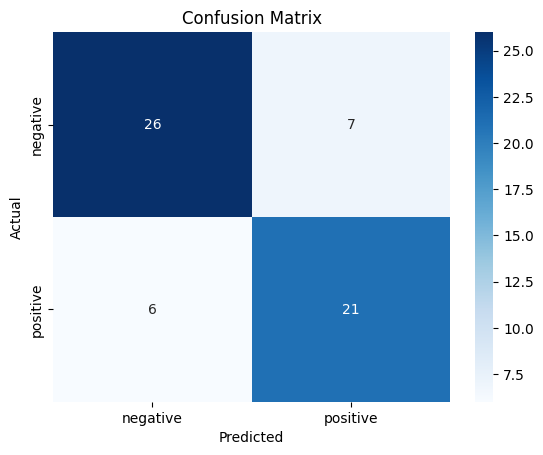

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#**Case 1 | Task 2**

## 1. Informasi dan Insight yang Dapat Diperoleh dari Data

Berdasarkan hasil eksplorasi dan pelatihan model menggunakan dataset `dataset_tweet_sentiment_cellular_service_provider.csv`, terdapat beberapa insight penting yang dapat diperoleh:

- **Distribusi Sentimen**  
  Dataset terdiri dari dua kelas sentimen, yaitu `positive` dan `negative`, masing-masing berjumlah seimbang (kurang lebih 50% untuk tiap kelas). Ini mendukung pelatihan model karena tidak terjadi bias terhadap salah satu kelas.

- **Isi dan Karakteristik Teks**  
  Tweet dengan sentimen `positive` umumnya berisi pujian, ucapan terima kasih, atau kata-kata positif. Sedangkan tweet dengan sentimen `negative` sering berisi keluhan terkait layanan seperti jaringan lemot, sinyal hilang, atau komplain terhadap provider.

- **Kata Kunci Dominan**  
  Analisis kata atau visualisasi word cloud dapat membantu menemukan kata kunci dominan untuk masing-masing kelas, misalnya:
  - Sentimen negatif: “lemot”, “jaringan”, “tidak bisa”, “pendusta”
  - Sentimen positif: “mantap”, “terima kasih”, “alhamdulillah”

- **Performa Model Terhadap Data Nyata**  
  Model mampu mengidentifikasi sentimen dengan cukup baik, ditunjukkan dari metrik evaluasi yang seimbang antara kelas `positive` dan `negative`.

## 2. Evaluasi Performa Model

### Akurasi Model

Model yang dilatih menghasilkan **akurasi pada data uji sebesar 78.33%** (`Test Accuracy: 0.7833`).  
Untuk ukuran dataset kecil (300 tweet, dengan 60 data uji), akurasi ini tergolong **cukup baik**, apalagi dengan model yang sederhana (LSTM + Embedding). Ini menunjukkan bahwa model mampu mengenali pola bahasa pada tweet yang berkaitan dengan sentimen.

### Laporan Klasifikasi (Classification Report)

| Label     | Precision | Recall | F1-Score | Jumlah Data |
|-----------|-----------|--------|----------|-------------|
| Negative  | 0.81      | 0.79   | 0.80     | 33          |
| Positive  | 0.75      | 0.78   | 0.76     | 27          |
| **Akurasi Total** |       –     |    –    | **0.78** | 60          |

- **Precision**: proporsi prediksi yang benar dari seluruh prediksi kelas tertentu.
- **Recall**: proporsi prediksi benar dibandingkan seluruh data aktual kelas tersebut.
- **F1-score**: harmonisasi antara precision dan recall.

Model menunjukkan kinerja yang **seimbang** antara dua kelas, walau performa terhadap `positive` sedikit lebih rendah.

### Confusion Matrix

```
                 Predicted
                 Neg    Pos
Actual  Neg      26     7
        Pos       6     21
```

- Model berhasil mengklasifikasikan 26 tweet negatif dan 21 tweet positif dengan benar.
- Terdapat 13 kesalahan klasifikasi dari 60 data (7 false positive, 6 false negative).
- Ini menunjukkan **model tidak bias ke salah satu kelas**, dan masih tergolong **stabil**.

## 3. Visualisasi Pendukung

- **Grafik Akurasi dan Loss**  
  Digunakan untuk melihat dinamika pembelajaran. Terlihat bahwa model mengalami overfitting setelah beberapa epoch, di mana akurasi training naik drastis, sedangkan akurasi validasi stagnan.

- **Confusion Matrix (Heatmap)**  
  Mempermudah identifikasi titik kelemahan model terhadap masing-masing kelas. Visualisasi memperkuat pemahaman distribusi kesalahan.

## 4. Rekomendasi Peningkatan Kualitas Data dan Model

### Peningkatan Kualitas Data:
- Tambahkan data tweet agar model belajar dari lebih banyak variasi.
- Sertakan kelas tambahan seperti `neutral` untuk memperkaya klasifikasi.
- Lakukan normalisasi lebih dalam (menghapus emoji, stopwords, dsb.).
- Hilangkan duplikasi dan spam agar distribusi data bersih.

### Peningkatan Model:
- Gunakan **pre-trained embeddings** (seperti GloVe atau FastText) untuk pemahaman kata yang lebih baik.
- Coba arsitektur lain seperti GRU, atau model transformer (misalnya BERT).
- Tambahkan **regularisasi** (dropout lebih tinggi atau L2 regularization).
- Gunakan **cross-validation** untuk evaluasi yang lebih konsisten.

## 5. Kesimpulan

Model klasifikasi sentimen berbasis LSTM berhasil mempelajari pola bahasa dalam tweet dan menghasilkan akurasi sekitar **78%**, dengan metrik evaluasi yang seimbang antar kelas.  
Insight dari data mendukung pemahaman tentang persepsi pelanggan terhadap layanan provider seluler.  
Meskipun masih dapat ditingkatkan, model ini sudah cukup layak untuk tugas klasifikasi awal dan bisa dikembangkan lebih lanjut dengan pendekatan yang lebih kompleks dan data yang lebih besar.
